<a href="https://colab.research.google.com/github/Omar-Works/ID-2024/blob/main/mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the **MalariaV2** dataset

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Function to evaluate performance

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report

def find_result():
    predictions = model.predict(test_generator)
    predictions = (predictions > 0.5).astype(int).flatten()  # Convert to binary labels

    # True labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, predictions)
    classification_error = 1 - accuracy
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    specificity = recall_score(y_true, predictions, pos_label=0)
    fall_out = 1 - specificity
    mcc = matthews_corrcoef(y_true, predictions)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Fall-Out:", fall_out)
    print("Matthews Correlation Coefficient:", mcc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, predictions))
    print("Classification Report:\n", classification_report(y_true, predictions))

In [27]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import tensorflow as tf

# Load the MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create a new model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [28]:
# Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest', validation_split=0.2
)

# Use separate subsets for training and validation
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Evaluate the model on the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [29]:
#Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',        # Could also use 'val_accuracy' depending on your preference
    patience=5,                # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # You can keep the number of epochs as a high number, early stopping will halt early if no improvement
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add early stopping callback here
)

# Evaluate the model
find_result()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4799 - loss: 0.7803 - val_accuracy: 0.6867 - val_loss: 0.6317
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.6313 - loss: 0.6243 - val_accuracy: 0.9277 - val_loss: 0.4799
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step - accuracy: 0.6911 - loss: 0.5584 - val_accuracy: 0.9036 - val_loss: 0.4327
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.7920 - loss: 0.4777 - val_accuracy: 0.9277 - val_loss: 0.3397
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - accuracy: 0.8561 - loss: 0.4061 - val_accuracy: 0.9157 - val_loss: 0.3199
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.8663 - loss: 0.3623 - val_accuracy: 0.9518 - val_loss: 0.2729
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.8586 - loss: 0.3391 - val_accuracy: 0.9759 - val_loss: 0.2469
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.9198 - loss: 0.2957 - val_accuracy: 0.8916 - val_l

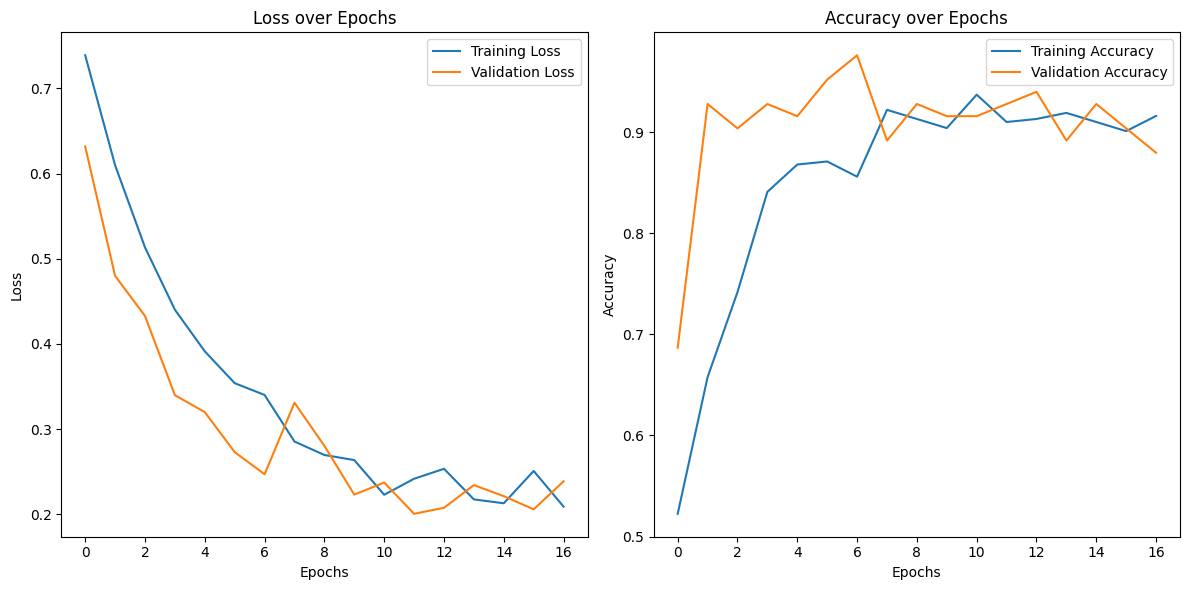

In [30]:
# Import Matplotlib
import matplotlib.pyplot as plt # This line imports the 'pyplot' module from Matplotlib and assigns it the alias 'plt'

# Plotting the loss
plt.figure(figsize=(12, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
result = model.evaluate(test_generator)  # Assuming test_generator is defined
print('Test Loss:', result[0])
print('Test Accuracy:', result[1])


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.9019 - loss: 0.2526
Test Loss: 0.23474949598312378
Test Accuracy: 0.9179104566574097
